In [2]:
import os
import pickle
import numpy as np
import cv2

# Step 1: Load and preprocess data
def load_cifar10_data(data_dir):
    X = []
    Y = []
    # Load all training batches
    for i in range(1, 6):
        with open(os.path.join(data_dir, f'data_batch_{i}'), 'rb') as file:
            batch = pickle.load(file, encoding='latin1')
            X.append(batch['data'])
            Y.extend(batch['labels'])
    
    # Concatenate data and reshape to the correct image format (batch_size, height, width, channels)
    X = np.concatenate(X).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    
    # Load test data
    with open(os.path.join(data_dir, 'test_batch'), 'rb') as file:
        test_batch = pickle.load(file, encoding='latin1')
        X_test = test_batch['data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        Y_test = test_batch['labels']
    
    # Combine train and test data
    X = np.vstack((X, X_test))
    Y.extend(Y_test)
    Y = np.array(Y)
    
    return X, Y

# Image transformation functions
def rotate_image(image, angle):
    """ Rotate the image by a given angle """
    center = (image.shape[1] // 2, image.shape[0] // 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

def add_gaussian_noise(image, mean=0, std=0.1):
    """ Add Gaussian noise to an image """
    gauss = np.random.normal(mean, std, image.shape).astype('uint8')
    noisy_img = cv2.add(image, gauss)
    return noisy_img

def add_occlusion(image, coverage=0.1):
    """ Add a black rectangle occlusion """
    x = int(np.random.rand() * image.shape[1])
    y = int(np.random.rand() * image.shape[0])
    w = int(image.shape[1] * coverage)
    h = int(image.shape[0] * coverage)
    occluded_image = image.copy()
    occluded_image[y:y+h, x:x+w] = 0
    return occluded_image

def crop_and_rotate(image, crop_percent=0.1, angle=15):
    """ Crop the edges of the image and rotate """
    crop_size = int(crop_percent * image.shape[0])
    cropped_img = image[crop_size:-crop_size, crop_size:-crop_size]
    return rotate_image(cropped_img, angle)


In [3]:
# Loading the CIFAR-10 dataset
data_dir = 'cifar-10-batches-py'
train_images, train_labels = load_cifar10_data(data_dir)


In [4]:
# Experiment 2: Small Noise (rotation + small occlusion)
small_noise_images = [add_occlusion(rotate_image(img, 1.5), coverage=0.05) for img in train_images]

# Experiment 3: Medium Noise (Gaussian noise + larger occlusion)
medium_noise_images = [add_occlusion(add_gaussian_noise(img, std=0.1), coverage=0.2) for img in train_images]

# Experiment 4: Large Noise (Gaussian noise + crop and rotate)
large_noise_images = [crop_and_rotate(add_gaussian_noise(img, std=0.2), crop_percent=0.1, angle=15) for img in train_images]


In [5]:
# Example to save the dataset
np.save('small_noise_cifar10.npy', small_noise_images)

In [6]:
np.save('medium_noise_cifar10.npy', medium_noise_images)

In [7]:
np.save('large_noise_cifar10.npy', large_noise_images)

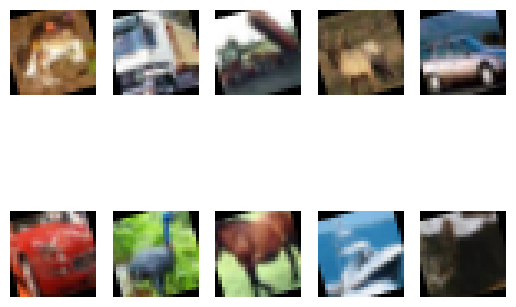

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 加载 .npy 文件
data = np.load('small_noise_cifar10.npy')

# CIFAR-10 数据的形状
# CIFAR-10 数据集的图片通常是 32x32 像素的 RGB 图像
# data 的形状可能是 (num_samples, 32, 32, 3)
# 如果 data 不是这样的形状，你可能需要调整下面的索引

# 显示前 10 张图像
num_images = 10
for i in range(num_images):
    plt.subplot(2, 5, i + 1)  # 创建一个 2 行 5 列的子图
    plt.imshow(data[i])  # 显示第 i 张图像
    plt.axis('off')  # 关闭坐标轴显示

plt.show()